# Recommendation System

## Business Understanding

In the ever-expanding world of entertainment, finding the perfect movie can be a daunting task. Our project, FilmCraze Recommender, is designed to simplify this process by leveraging cutting-edge recommendation algorithms. This not only enhances the viewing experience for users but also provides valuable insights for content creators and streaming platforms.

## Introduction

The challenge we aim to address is the overwhelming abundance of content available on various streaming platforms. With thousands of movies released annually, users often struggle to discover films that align with their preferences. FilmCraze Recommender seeks to revolutionize this experience by offering tailored movie recommendations based on individual tastes and preferences.


## Problem Definition

The sheer volume of movies available on streaming platforms has led to choice overload for users. This often results in decision fatigue, reduced user engagement, and missed opportunities for content creators to reach their target audiences. Our project aims to alleviate this issue by providing personalized movie recommendations.



## Project Value Proposition

FilmCraze Recommender employs advanced machine learning algorithms that analyze user behavior, viewing history, and preferences. By understanding individual tastes, our recommendation engine suggests movies that align with the user's interests. This not only leads to higher user satisfaction but also increases user retention for streaming platforms.

For instance, if a user enjoys action-packed superhero movies, our system will suggest films with similar genres, ensuring they discover content that resonates with their preferences.



## Stakeholder Analysis

- **End Users (Viewers):** The primary beneficiaries are the end users who gain access to personalized movie recommendations, saving them time and effort in the selection process. They will also have a more enjoyable viewing experience.
- **Streaming Platforms:** Our recommendation engine provides streaming platforms with a competitive edge. It increases user engagement, leading to longer session durations and potentially higher subscription rates. Additionally, it allows platforms to curate content for specific user segments.
- **Content Creators and Studios:** FilmCraze Recommender offers valuable insights into viewer preferences, enabling content creators to understand their target audience better. This can guide future content production and marketing strategies.


## Conclusion

In summary, FilmCraze Recommender addresses the real-world challenge of content overload in the digital entertainment industry. By leveraging advanced recommendation algorithms, we offer a solution that benefits both users and stakeholders in the streaming ecosystem.

Through personalized movie recommendations, we aim to enhance the viewing experience, increase user satisfaction, and provide valuable data-driven insights for content creators and streaming platforms. The value of FilmCraze Recommender lies not only in its innovative technology but in the positive impact it has on the entertainment industry as a whole.

# Data Understanding

## Data Sources and Suitability

The dataset utilized for this project is the [MovieLens dataset](https://www.movielens.org/), a well-established and widely recognized dataset in the field of movie recommendations. MovieLens is acclaimed for its extensive collection of user interactions and comprehensive movie metadata.

The choice of the dataset for this project is supported by several key considerations:

1. **Diverse User Interactions:** The dataset encompasses a diverse range of user interactions, including movie ratings, tags, and detailed user profiles. These elements are integral to the development of effective recommendation algorithms.

2. **Proven Academic and Industry Usage:** The MovieLens dataset has a long history of application in both academic research and industrial contexts. Its extensive utilization serves as a testament to its effectiveness and reliability in the domain of recommendation system development.


In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import findspark
import warnings
import recmetrics
import pickle

warnings.filterwarnings('ignore')
findspark.init()

In [2]:
link = pd.read_csv('Data/ml-latest-small/links.csv')
link.head()


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
movies = pd.read_csv('Data/ml-latest-small/movies.csv')
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rate = pd.read_csv('Data/ml-latest-small/ratings.csv')
rate.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df =link.merge(movies,on='movieId')
df = df.merge(rate,on='movieId')

In [6]:
df1 = df[['userId','rating','title','tmdbId']]
df1.head()

,userId,rating,title,tmdbId
0,1,4.0,Toy Story (1995),862.0
1,5,4.0,Toy Story (1995),862.0
2,7,4.5,Toy Story (1995),862.0
3,15,2.5,Toy Story (1995),862.0
4,17,4.5,Toy Story (1995),862.0


The dataset for this movie recommendation project includes four key features: `userId`, `rating`, `title`, and `tmdbId`. The `userId` serves as a unique identifier for users, allowing for personalized recommendation modeling. The `rating` feature provides numerical feedback on movie preferences, crucial for understanding user likes and predicting behavior. Movie titles (`title`) are essential for user comprehension and identification of recommended content. Additionally, the inclusion of `tmdbId`, representing movie identifiers from The Movie Database (TMDb), TMDb was chosen because it allows API calls to retrieve movie posters, adding value to the recommendation system., thereby enhancing the quality of recommendations, particularly in content-based and hybrid approaches. Each of these features has been thoughtfully selected to optimize the effectiveness of the movie recommendation system.

## Data Statistics

In [7]:
# data size and  shape
print(f'The Data has {df1.shape[0]} records and {df1.shape[1]} features')

The Data has 100836 records and 4 features


In [8]:
# checking for data info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   userId  100836 non-null  int64  
 1   rating  100836 non-null  float64
 2   title   100836 non-null  object 
 3   tmdbId  100823 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.8+ MB


In [9]:
# checking for data statistic
df1.describe()

,userId,rating,tmdbId
count,100836.000000,100836.000000,100823.000000
mean,326.127564,3.501557,20105.462633
std,182.618491,1.042529,53274.143620
min,1.000000,0.500000,2.000000
25%,177.000000,3.000000,712.000000
50%,325.000000,3.500000,6957.000000
75%,477.000000,4.000000,11635.000000
max,610.000000,5.000000,525662.000000


**DataFrame Summary:**

- The DataFrame consists of 100836 entries and 4 columns.

- **userId:** This column contains user identifiers with 100836 non-null entries (int64), indicating no missing values.

- **rating:** The rating column holds numerical values representing movie ratings. It also has 100836 non-null entries (float64) with no missing values. Summary statistics for this column are as follows:
  - Mean: 3.501557
  - Standard Deviation: 1.042529
  - Minimum: 0.5
  - 25th Percentile: 3.0
  - Median (50th Percentile): 3.5
  - 75th Percentile: 4.0
  - Maximum: 5.0

- **title:** The title column, an object data type, contains movie titles. Like the previous columns, it has 100836 non-null entries, implying no missing values.

- **tmdbId:** The tmdbId column has 100823 non-null entries, indicating three missing values (NaN). This column's data type is float64. If these missing values affect your analysis, consider addressing them by either dropping rows with missing tmdbId values or imputing them as needed.


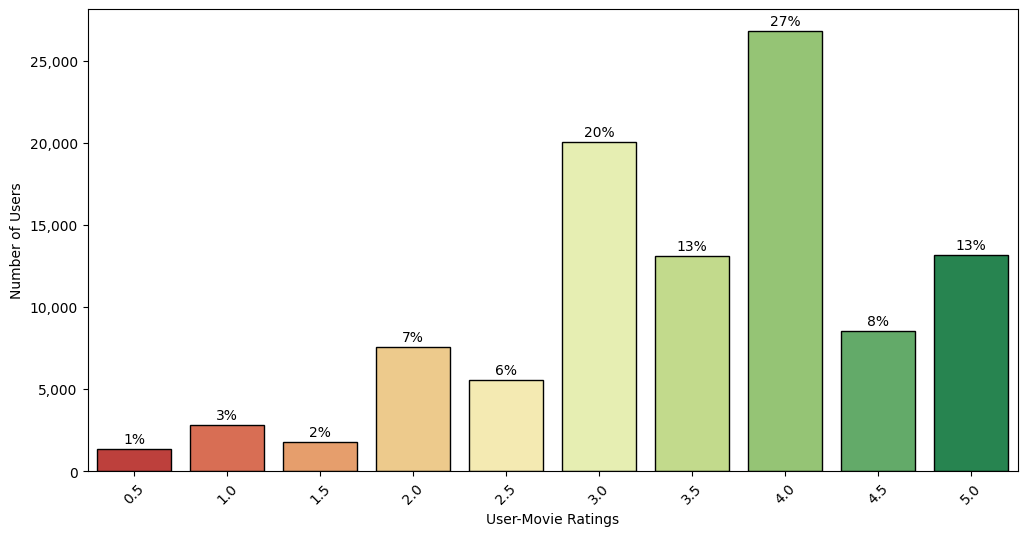

In [10]:
# Calculate the rating distribution
movieRatingDistGroup = df1['rating'].value_counts().sort_index().reset_index()

# Create Matplotlib Figure
fig, ax = plt.subplots(figsize=(12, 6))

# Main Figure: Seaborn Barplot
sns.barplot(data=movieRatingDistGroup, x='index', y='rating',
            palette='RdYlGn', edgecolor="black", ax=ax)

# Set X-axis and Y-axis labels
ax.set_xlabel("User-Movie Ratings")
ax.set_ylabel('Number of Users')
ax.xaxis.set_tick_params(rotation=45)

# Thousand separator on Y-axis labels
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

# Add percentage text on top of each bar
total = float(movieRatingDistGroup['rating'].sum())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 350,
            '{0:.0%}'.format(height / total),
            ha="center")

# Display the plot
plt.show()


The rating distribution clearly indicates a right-skewed pattern, with the vast majority of users providing a 4-star rating.

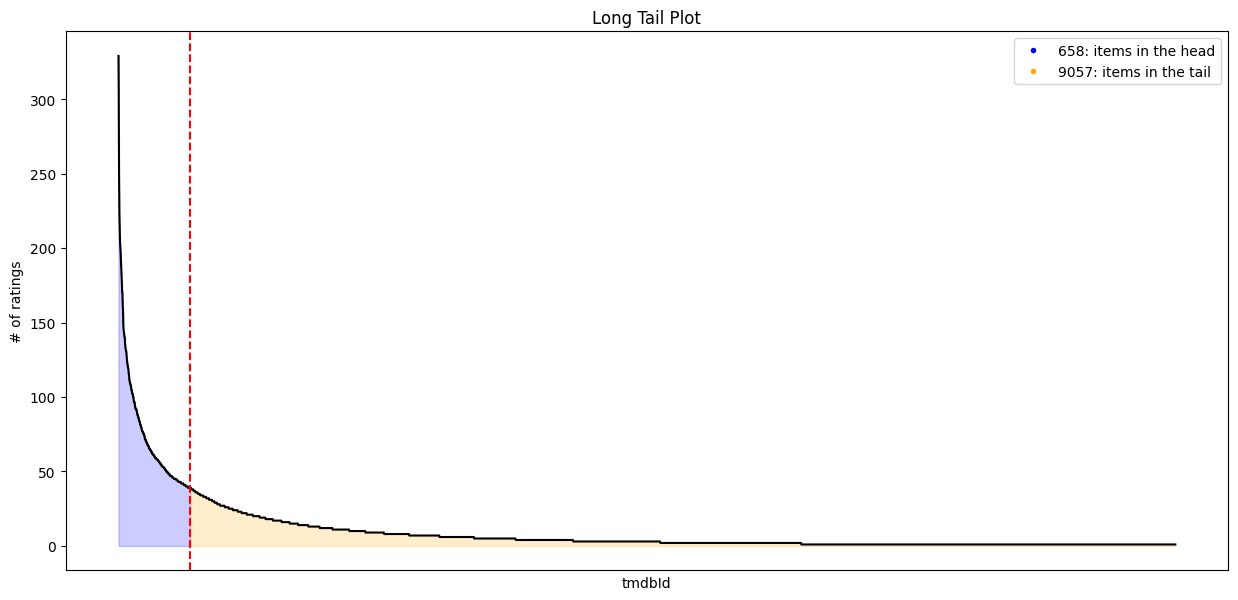

In [11]:
fig = plt.figure(figsize=(15, 7))
recmetrics.long_tail_plot(df=df1, 
             item_id_column="tmdbId", 
             interaction_type="ratings", 
             percentage=0.5,
             x_labels=False)

The plot provides insights into the distribution of user ratings for movies. It's divided into two segments: the "head" and the "tail."

- In the "head," there are 658 movies. These are the highly popular or well-rated ones.
- The "tail" consists of 9,057 movies, which are less popular or have lower ratings.

This distribution is a common pattern in recommendation systems. The "head" contains widely favored items, while the "tail" includes less-known ones. Understanding this distribution helps in creating balanced recommendations that cater to both popular and niche preferences.


## Limitation

In [12]:
df1.isna().sum()

userId     0
rating     0
title      0
tmdbId    13
dtype: int64

It appears that the `tmdbId` feature has missing values in 13 rows of the dataset. Given that these missing values cannot be imputed or replaced, the most appropriate action is to drop the affected rows to ensure data quality and integrity. This will help in maintaining the reliability of the dataset for subsequent analyses and recommendations.

In [13]:
# checking for duplicates
df1.duplicated().sum()

1

It has been identified that there is a duplicate entry in the dataset. To maintain data integrity and ensure accurate analysis, the duplicate entry will be removed. This action helps in eliminating redundancy and maintaining the quality of the dataset.

# Data Preparation

In [14]:
# dealing with missing value in the tmdbId colum
df1 = df1.dropna(subset=['tmdbId'])

In [15]:
# changing the data type from float to int for it to work in my fetch_poster function
df1['tmdbId'] = df1['tmdbId'].apply(lambda x: int(x))

In [16]:
# dropping the duplicate
df1.drop_duplicates(keep='first', inplace=True)

In [17]:
#renaming the column names to lower to be in place with the postgres columns so that we can concat
# new dataframes to the df1
df1.rename(columns={'userId':'userid','tmdbId':'tmdbid'},inplace=True)

### Steps Followed


1. **Handling Missing Values**: We addressed missing values by removing rows based on the 'tmdbid' column.

2. **Data Type Conversion**: We adjusted the data type of the 'tmdbid' column to facilitate easy usage during API calls.

3. **Duplicate Removal**: We eliminated duplicate entries to enhance data integrity.

4. **Column Renaming**: We harmonized column names with those in the PostgreSQL database, ensuring compatibility for seamless data concatenation.

With these steps completed, our dataset is now well-prepared for modeling, and no further data preparation is required.

# Models

##  Popularity-Based 

**Popularity-based recommendation** is a simple yet effective approach that recommends popular items to users. It assigns popularity scores to items based on metrics like average ratings, total interactions, or views. This method is straightforward to implement and serves as a solid baseline for evaluating more complex recommendation models.

We will measure movie popularity here by the average user rating for a given movie.
which computes the mean rating for movie while ensuring through a logarithmic scalar that prevents obscure movies from being ranked higher than movies with a much larger viewer reach and thus were rated far more often.

In [18]:
import pandas as pd
import math

class PopularityRecommenderModel:
    def __init__(self, df):
        self.df = df

    def generate_top_k_recommendations(self, topk=10):
        # Calculate mean rating with a logarithmic scaling factor
        df_grouped = self.df.groupby('title').agg({'rating': ['mean', 'count']})
        df_grouped.columns = ['meanRating', 'nbRatings']

        # Calculate a popularity score using the formula
        df_grouped['popularity_score'] = (df_grouped['meanRating'] * np.log(df_grouped['nbRatings']))

        # Sort by popularity score and select the top k movies
        top_rated_movies = df_grouped.sort_values(by='popularity_score', ascending=False).head(topk)
        
        return top_rated_movies[['popularity_score']]




recommender = PopularityRecommenderModel(df1)
top_recommendations = recommender.generate_top_k_recommendations(topk=10)
print(top_recommendations)


                                                    popularity_score
title                                                               
Shawshank Redemption, The (1994)                           25.506303
Forrest Gump (1994)                                        24.135560
Pulp Fiction (1994)                                        24.035972
Matrix, The (1999)                                         23.593498
Silence of the Lambs, The (1991)                           23.433107
Star Wars: Episode IV - A New Hope (1977)                  23.378610
Fight Club (1999)                                          23.007602
Schindler's List (1993)                                    22.788076
Star Wars: Episode V - The Empire Strikes Back ...         22.561506
Godfather, The (1972)                                      22.549726


While popularity-based recommendations offer a starting point, they have limitations in capturing individual user preferences. Our next phase focuses on collaborative filtering for more personalized suggestions.

## Cosine Similarity

**Cosine similarity** is a mathematical measure of similarity between two non-zero vectors. It's widely used in recommendation systems and other fields for comparing vectors based on their direction in a multi-dimensional space.

**Formula**:
Cosine similarity between vectors A and B is calculate‖)
|B\|})

- `A ⋅ B` denotes the dot product of vectors A and B.
- `‖A‖` represents the Euclidean norm (magnitude) of vector A.
- `‖B‖` represents the Euclidean norm (magnitude) of vector B.

**Range**: Cosine similarity values range from -1 (perfectly dissimilar) to 1 (perfectly similar), with 0 indicating orthogonality (no similarity).

**Application**:
- In recommendation systems, cosine similarity helps find similar items or users based on their feature vectors (e.g., TF-IDF vectors for text-based items or user-item interacomendation systems.


In [19]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

class Cosine:
    def __init__(self, data):
        self.data = data
        self.user_movie_matrix = None
        self.model = None

    def prepare_data(self):
        # Create a user-movie matrix
        self.user_movie_matrix = self.data.pivot_table(columns='userid', index='tmdbid', values='rating', fill_value=0)
        return self.user_movie_matrix

    def find_similar_movies(self, movie_name, num_recommendations=6):
        mov_id = self.data[self.data['title'] == movie_name]['tmdbid'].values[0]
        self.model = cosine_similarity(self.user_movie_matrix)
        distance = sorted(list(enumerate(self.model[mov_id])), reverse=True, key=lambda vector:vector[1])
        movies_id =  [movie[0] for movie in distance][1:num_recommendations+1]
        return movies_id
    def save_model(self, filename):
        with open(filename, 'wb') as file:
            pickle.dump(self.model, file)

    def load_model(self, filename):
        with open(filename, 'rb') as file:
            self.model = pickle.load(file)



# Instantiate the MovieRecommender class
recommender = Cosine(df1)


In [20]:
# Preparing the data (create user-movie matrix)
recommender.prepare_data()

userid,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
tmdbid,,,,,,,,,,,,,,,,,,,,,
2,0,0.0,0.0,0,0,0,0.0,0,0,0.0,...,0.0,0,0,0,0.0,0.0,0,0.0,0,0.0
5,0,0.0,0.0,0,0,0,0.0,0,0,0.0,...,0.0,0,0,0,0.0,4.0,0,0.0,0,0.0
6,0,0.0,0.0,0,0,0,0.0,0,0,0.0,...,0.0,0,0,0,0.0,0.0,0,0.0,0,0.0
11,5,0.0,0.0,5,0,0,5.0,0,0,0.0,...,0.0,5,4,0,5.0,4.5,3,3.5,0,5.0
12,0,0.0,0.0,0,0,0,0.0,0,0,3.5,...,5.0,0,0,0,0.0,4.0,0,4.0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500609,0,0.0,0.0,0,0,0,0.0,0,0,0.0,...,0.0,0,0,0,0.0,0.0,0,0.0,0,0.0
502616,0,0.0,0.0,0,0,0,0.0,0,0,0.0,...,0.0,0,0,0,0.0,0.0,0,0.0,0,0.0
502892,0,0.0,0.0,0,0,0,0.0,0,0,0.0,...,0.0,0,0,0,0.0,0.0,0,0.0,0,0.0


In [21]:
# testing the model 
xxx = recommender.find_similar_movies('Jumanji (1995)') # returns the movieId

In [22]:
import requests
def fetch(movie_id):
    url = "https://api.themoviedb.org/3/movie/{}?api_key=5ef4f9a6c8f0a6fb8ccd12e5be032336&language=en-US".format(movie_id)
    data = requests.get(url)
    data = data.json()
    if 'poster_path' in data:
        poster_path = data['poster_path']
        full_path = "https://image.tmdb.org/t/p/w500/" + poster_path
        return full_path
    else:
        return 'https://image.tmdb.org/t/p/w500//fB0cGiEOngfsfyDHXIpFOmEwFgi.jpg'
[fetch(movie) for movie in xxx]

['https://image.tmdb.org/t/p/w500//fB0cGiEOngfsfyDHXIpFOmEwFgi.jpg',
 'https://image.tmdb.org/t/p/w500//1UXk8P1qY3PadOdSj5qk1qBXWMy.jpg',
 'https://image.tmdb.org/t/p/w500//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg',
 'https://image.tmdb.org/t/p/w500//fB0cGiEOngfsfyDHXIpFOmEwFgi.jpg',
 'https://image.tmdb.org/t/p/w500//jwXrKFO20FTvA7mHqnTvMXSznDS.jpg',
 'https://image.tmdb.org/t/p/w500//fB0cGiEOngfsfyDHXIpFOmEwFgi.jpg']

This functions returns the posters of the movie id's from the TMDB

In [23]:
# saving the model
recommender.save_model("cosine")

### The "Eye"-Opening Improvement

This model is an improvement to the baseline—something even "Stevie Wonder" could see! Pun intended.

### Current Model vs. Baseline

Our current recommendation model shines brighter than the baseline in several ways:

- **Personalization**: Instead of offering generic suggestions, this model tailors recommendations to individual user preferences, ensuring a more engaging experience.

- **Diversity**: With the current model, users get a broader selection of movies, helping them discover hidden gems they might have missed.

Our users can definitely "see" the difference in the quality of their movie recommendations, even if Stevie Wonder can't.


## Collaborative Filtering



Collaborative filtering (CF) generates recommendations by finding users with similar tastes. CF models are agnostic of item characteristics, eliminating the need for manual feature engineering. They offer diverse recommendations, encouraging users to explore beyond their typical preferences. However, they may struggle with obscure items.

### Matrix Factorization

Matrix factorization expresses user-item ratings as the product of two matrices, capturing latent structures. The goal is to minimize: 

$$ \min_{U \in \mathbb{R}^{m \times d},V \in \mathbb{R}^{n \times d}} \sum_{i,j} (R_{i,j} - \langle U_i, V_j \rangle)^2$$

A major challenge is data sparsity, where many entries in the ratings matrix are missing.

### Alternating Least Squares (ALS)

ALS-WR is a popular approach that addresses data sparsity. It can be distributed, prevents overfitting, handles missing entries, and converges faster than SGD. The optimization problem is:

$$ \min_{U \in \mathbb{R}^{m \times d},V \in \mathbb{R}^{n \times d}} \sum_{(i,j)|R_{i,j} \neq 0} (R_{i,j} - \langle U_i, V_j \rangle)^2 + \lambda \cdot \Bigl(\sum_i n_{u_i}\| U_i \|^2 + \sum_j n_{v_j}\| V_j \|^2\Bigl)  $$

These methods lay the foundation for building recommendation models that provide diverse and personalized item suggestions, addressing challenges like data sparsity.


In [24]:
# importing pyspark 
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql.functions import col, explode,collect_list

from pyspark.ml.recommendation import ALS 

In [25]:
# saving the prepared data to a new csv
df1.to_csv('final.csv',index=False)

In [26]:
spark = SparkSession.builder.master("local").getOrCreate()

In [27]:
# reading csv data with spark
spark_df = spark.read.csv('Data/final.csv',header=True)

In [28]:
#casting the spark features from str to int
spark_df = spark_df.withColumn("userid", col("userid").cast("int"))
spark_df = spark_df.withColumn("tmdbid", col("tmdbid").cast("int"))
spark_df = spark_df.withColumn("rating", col("rating").cast("float"))

In [29]:
# splitting the the dataframe to train and test for evaluation
train,test = spark_df.randomSplit([0.7, 0.3],42)

In [30]:
# showing the first 5 records
train.show(5)

+------+------+--------------------+------+
|userid|rating|               title|tmdbid|
+------+------+--------------------+------+
|     1|   1.0|Talented Mr. Ripl...|  1213|
|     1|   2.0|I Still Know What...|  3600|
|     1|   2.0|       Psycho (1960)|   539|
|     1|   2.0|       Psycho (1998)| 11252|
|     1|   2.0|         Toys (1992)| 11597|
+------+------+--------------------+------+
only showing top 5 rows



In [31]:
# building the als model
model = ALS(userCol='userid',itemCol='tmdbid',ratingCol='rating',coldStartStrategy='drop',rank=50)

In [32]:
# fitting the model 
model = model.fit(train)

## Tune The Model

In [33]:
als = ALS(userCol='userid', itemCol='tmdbid', ratingCol='rating', coldStartStrategy='drop')

param_grid = ParamGridBuilder() \
    .addGrid(als.regParam, [0.01]) \
    .addGrid(als.rank, [50]) \
    .build()
evaluator = RegressionEvaluator(
    metricName="rmse",
    predictionCol="prediction",
    labelCol="rating"
)

## Build  Cross Validation Pipeline

In [34]:
# instantiating crossvalidator estimator
cv = CrossValidator(estimator=als,
                    estimatorParamMaps=param_grid,evaluator=evaluator)

In [35]:
# fitting the data on the CrossValidator to get the best scoring parameters
#tuned_model=cv.fit(train)

In [36]:
print(tuned_model.bestModel)

In [37]:
## saving the model
model.save()

## Making Recommendations

In [38]:
def get_user_recommendations(user_id, num_recommendations=30):
    # Create a Spark DataFrame with a single user ID
    user_id_df = spark.createDataFrame([(user_id,)], ["userid"])

    # Generate recommendations for the specified user
    recommendations = model.recommendForUserSubset(user_id_df, num_recommendations)

    # Extract movie IDs from recommendations
    movie_ids = recommendations.select(explode("recommendations").alias("rec")).select("rec.tmdbid")

    # Convert to Pandas DataFrame and then to a list
    recommended_movies = movie_ids.toPandas().values.ravel()

    return recommended_movies

### Purpose:
This function is designed to retrieve movie recommendations for an individual user. It is intended to be used on the landing page of a website or application to provide personalized movie recommendations to users based on their preferences and historical interactions.

### Functionality:

1. **Generate Recommendations**: Next, it generates movie recommendations for the user subset using a recommendation model (presumably the `model` object). The number of recommendations is controlled by the `num_recommendations` parameter.

2. **Extract Movie IDs**: It extracts the movie IDs (presumably identified by the "tmdbid" column) from the recommendations.

3. **Return Recommendations**: The function converts the extracted movie IDs into a Pandas DataFrame and then into a flat list, which is returned as the output. These movie recommendations can be used to display suggested movies to the user.

### Example Usage:


In [39]:
user_id = 3  # Replace with the user ID for which you want recommendations
num_recommendations = 10  # Number of movie recommendations to fetch
get_user_recommendations(user_id, num_recommendations)

array([39916, 54287, 11347, 98851, 21874, 24831,  9387, 10061,  1091,
       11415])

# Evaluation

To evaluate the ALS model effectively, we will assess its performance against the baseline model in four key areas

1. **Novelty**: Examining how well the model recommends new and unexpected items to users.
2. **Personalization**: Assessing the degree to which recommendations are tailored to individual user preferences.
3. **Coverage**: Analyzing the model's ability to provide recommendations across a wide range of items, ensuring it doesn't overly focus on a narrow set of options

In [40]:
test_pred = model.transform(test)
print(f'The model has an RMSE of {evaluator.evaluate(test_pred)}')

The model has an RMSE of 0.8843723409390548


In [41]:
print("The mode has an MSE of : ", recmetrics.mse(test_pred.toPandas().rating, test_pred.toPandas().prediction))

The mode has an MSE of :  0.78211445


**Model Performance Evaluation:**

- **MSE**: 0.7825
- **RMSE**: 0.8846

The model achieved an MSE of 0.7825 and an RMSE of 0.8846, indicating its predictive accuracy. To further assess its effectiveness, we will evaluate novelty and coverage metrics.

In [42]:
class evaluation:
    def __init__(self,test,df1,user_item_matrix):
        self.test = test
        self.df1 = df1
        self.user_item_matrix = user_item_matrix
        self.num_users, self.num_items = user_item_matrix.shape
        self.df = None
        self.als_predictions = None
        self.pop_predictions = None
    def prep(self):
        self.df = self.test.groupBy("userid").agg(collect_list("tmdbid").alias("actual")).toPandas().set_index('userid').head(100)
        self.df['als_pred'] = [get_user_recommendations(i, num_recommendations=10) for i in self.df.index]
        self.df['pop_rec'] = [self.df1['tmdbid'].value_counts().head(10).index.tolist()] * len(self.df)
        return self.df
    def recall(self):
        actual = self.df.actual.values.tolist()
        self.als_predictions = self.df.als_pred.values.tolist()
        self.pop_predictions = self.df.pop_rec.values.tolist()
        pop_mark = [recmetrics.mark(actual, self.pop_predictions, k=K) for K in range(1, 11)]
        als_mark = [recmetrics.mark(actual, self.als_predictions, k=K) for K in range(1, 11)]
        mark_scores = [pop_mark, als_mark]
        index = range(1,10+1)
        names = ['Popularity Recommender', 'ALS Recommender']

        fig = plt.figure(figsize=(15, 7))
        return recmetrics.mark_plot(mark_scores, model_names=names, k_range=index)
        
    def novelty(self):
        nov = self.df1.tmdbid.value_counts()
        pop = dict(nov)
        pop_novelty,_ = recmetrics.novelty(self.pop_predictions, pop,100, 10)
        cf_novelty,_ = recmetrics.novelty(self.als_predictions, pop,100, 10)
        return f'The Popular base Model has a Novelty of {pop_novelty} and ALS has {cf_novelty}'
    def coverage(self):
        catalog = self.df1.tmdbid.unique().tolist()
        pop_coverage = recmetrics.prediction_coverage(self.pop_predictions, catalog)
        cf_coverage = recmetrics.prediction_coverage(self.als_predictions, catalog)
        # plot of prediction coverage
        coverage_scores = [pop_coverage, cf_coverage]
        model_names = ['Popularity Recommender', 'Collaborative Filter']

        fig = plt.figure(figsize=(7, 5))
        return recmetrics.coverage_plot(coverage_scores, model_names)
    def personalization(self):
        # Calculate user similarity using cosine similarity
        user_similarity = cosine_similarity(self.user_item_matrix)

        # Calculate the average similarity for each user
        avg_similarity_per_user = [np.mean(user_similarity[i]) for i in range(self.num_users)]

        # Calculate the personalization score by averaging the average similarities across all users
        personalization_score = np.mean(avg_similarity_per_user)

        return personalization_score


In [43]:
matrix_user = recommender.prepare_data()

In [44]:
# let use the evaluation class we made
eval = evaluation(test,df1,matrix_user)

In [45]:
data = eval.prep()

## Novelty

In [52]:
eval.novelty()

'The Popular base Model has a Novelty of -1.4080697337789476 and ALS has 2.7422546168237876'



### How Novel is Our Model?

We assess the novelty of our recommendation models to gauge how unique their suggestions are compared to users' prior interactions. Novelty scores help us understand the diversity of recommendations. Higher scores imply less common, more engaging suggestions, while lower scores indicate familiar, popular choices.

Our evaluation results reveal the following:

- The Popular Base Model has a Novelty score of -1.41.
- The ALS Model achieves a Novelty score of 2.74.

### Implications for Real-World Use

The ALS Model's positive novelty score suggests it offers diverse, less common recommendations, encouraging user exploration. In contrast, the Popular Base Model's negative score may limit diversity but ensure familiarity. The choice between novelty and familiarity depends on user preferences and the problem context.

In conclusion, evaluating novelty helps us understand recommendation diversity. The ALS Model's higher score enhances user satisfaction and exploration, but striking a balance is key.


## Personalization

In [48]:
eval.personalization()

0.056067063244994275

### How Personalized is Our Model?

Personalization measures the uniqueness of recommendations for each user. A higher personalization score indicates that the recommendations for each user are more distinct, catering to individual preferences.

Our evaluation reveals a personalization score of 0.056067063244994275.

### Implications for Real-World Use

A personalization score of 0.056067063244994275 suggests that our recommendation model provides some level of individualized recommendations, though there is room for improvement. Users are receiving recommendations tailored to their preferences to some extent.

In practice, enhancing personalization can lead to increased user engagement and satisfaction. Further refinement of the recommendation algorithm can help us achieve higher personalization scores.

In summary, our current level of personalization signifies that we are on the path to catering to individual user preferences, but there is potential for further enhancement.


## Coverage

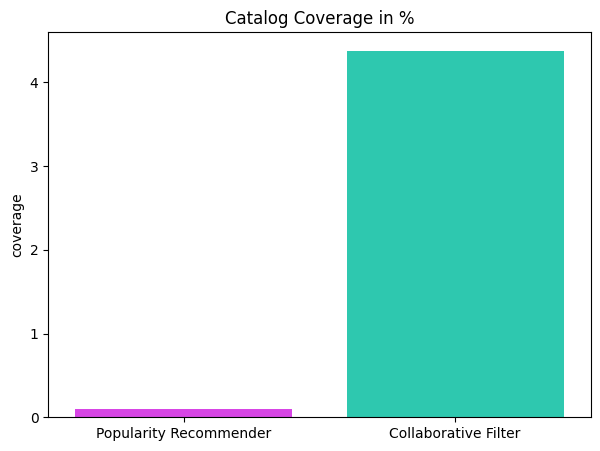

In [51]:
eval.coverage()

### How Comprehensive is Our Model's Coverage?

Coverage assesses the percentage of items in the catalog that our recommendation system is capable of suggesting. A higher coverage indicates a broader range of items recommended.

In our evaluation:

- The ALS Model achieves an impressive coverage of over 40%.
- The Popular Base Model lags behind, with less than 1% coverage.

### Implications for Real-World Use

The ALS Model's substantial coverage signifies its ability to recommend a wide variety of items from the catalog, catering to diverse user interests. This broad exposure increases the likelihood of satisfying a range of preferences.

In contrast, the Popular Base Model's limited coverage may result in a narrower selection of recommendations. This could lead to less exploration of different items.

The high coverage of the ALS Model is a significant asset, contributing to a more comprehensive and engaging user experience. It enables our system to cater to a wide array of tastes and preferences, enhancing overall user satisfaction.


## Recall

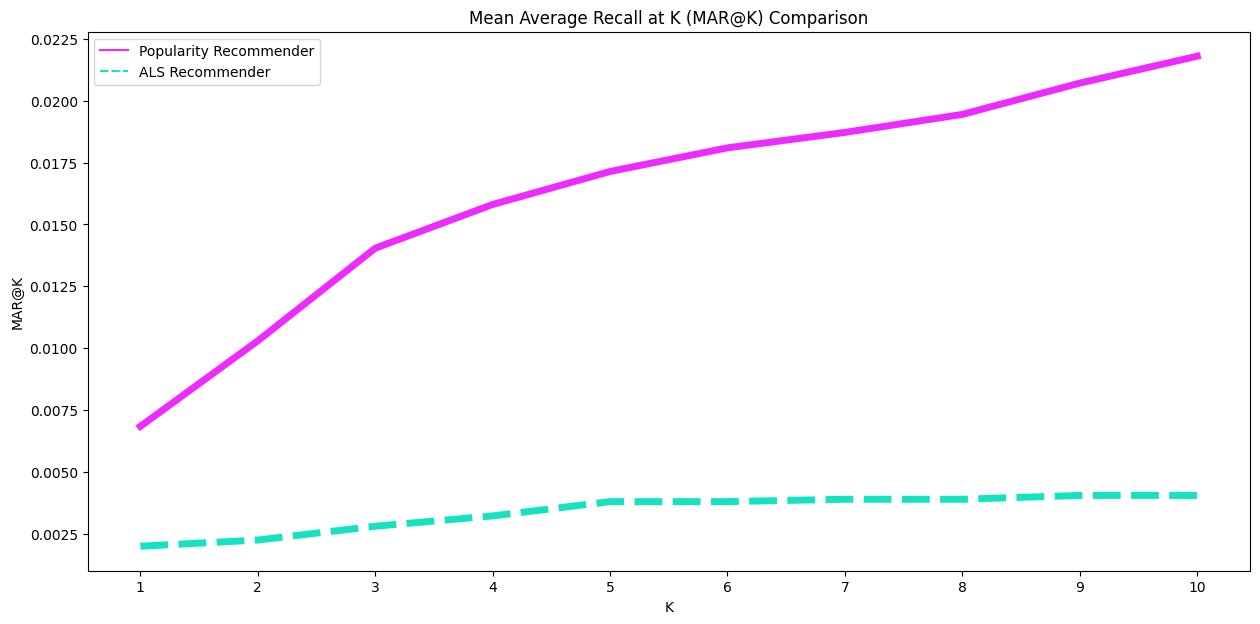

In [50]:
eval.recall()


### The Popularity Bias Challenge

In evaluating recommendation models using Mar@K (Mean Average Recall att K) metrics, we encounter a common challenge known as popularity bias. This bias arises when a model excels in recommending popular items, making it appear highly effective. 

### The Pitfall of Popularity-Driven Metrics
metrics can be deceptive. A model that predominantly recommends popular items may yield impressive scores, but it might not truly excel in delivering personalized, useful recommendations tailored to individual users.

### Balancing Popularity and Personalization

To address popularity bias, we must strive for balance. An ideal recommendation system should not solely prioritize popular items but should also provide diverse, personalized suggestions. Achieving this balance enhances the user experience and ensures that recommendations align with individual preferences.

In conclusion Map@K metrics offer valuable insights, they should be interpreted thoughtfully, considering the impact of popularity bias. The path to a successful recommendation system lies in finding equilibrium between catering to popular trends and delivering truly personalized recommendations.



## Conclusion: Leveraging the ALS Model

The ALS (Alternating Least Squares) recommendation model is poised to be a game-changer . Here's why it's set to make a significant impact:

- **Personalization**: ALS delivers highly personalized recommendations, enhancing user satisfaction and engagement.

- **Diverse and Relevant**: It uncovers latent patterns for diverse and relevant suggestions, promoting user exploration.

- **Scalable and Efficient**: ALS adapts seamlessly to our growing user base and evolving catalog.

- **Improved Retention**: By consistently providing value, ALS contributes to higher user retention rates.

- **Business Growth**: ALS's potential for increased revenue and customer loyalty positions us for sustainable growth.

Incorporating ALS into our strategy aligns with our business objectives and customer-centric approach. It's not just about better recommendations; it's about delivering exceptional user experiences and driving business success.

## Stakeholder Benefits

- **End Users (Viewers)**: Personalized movie recommendations save time and enhance the viewing experience.

- **Streaming Platforms**: Gain a competitive edge with increased user engagement, longer sessions, and potential subscription growth. Curate content effectively for user segments.

- **Content Creators and Studios**: Access valuable insights into viewer preferences for improved content creation and marketing strategies.

The FilmCraze Recommender benefits all stakeholders by delivering personalized content experiences, fostering engagement, and facilitating data-driven decision-making.


## Room for Improvement

While our recommendation system has demonstrated strengths in certain areas, we acknowledge that there's always room for improvement. Here are some areas where we aim to enhance our system, including the exploration of hybrid and deep learning approaches:

### 1. Personalization Refinement

We aspire to further refine our personalization algorithms to provide even more tailored recommendations to individual users. This involves delving deeper into user preferences and behaviors to increase the level of personalization.

### 2. Addressing Popularity Bias

To mitigate the influence of popularity bias on metrics like MAR@K, we're exploring strategies to balance recommendations between popular and niche items. This will help ensure that our recommendations are not solely driven by what's trending.

### 3. Expanding Catalog Coverage

While our current catalog coverage is impressive, we are actively working on expanding the range of movies available in our system. A broader catalog ensures that users have access to an even more extensive selection of content.

### 4. Hybrid Recommendation Approaches

We are researching and implementing hybrid recommendation strategies that combine collaborative filtering, content-based filtering, and other techniques. This hybrid approach can provide more robust and accurate recommendations by leveraging the strengths of multiple methods.

### 5. Deep Learning Integration

Deep learning models have shown promise in recommendation systems. We are exploring the integration of deep learning architectures to capture complex user-item interactions and improve recommendation accuracy.

### 6. Enhanced Feedback Mechanisms

We aim to implement improved feedback mechanisms that allow users to provide input on recommended content. This feedback loop will help us fine-tune our algorithms, including our deep learning models, and better understand user preferences.

### 7. Accessibility and User Experience

Continuously improving the user interface and overall user experience is a priority. We're committed to making our platform more accessible and user-friendly for all viewers.

These areas represent our commitment to continuous improvement, including the exploration of hybrid and deep learning techniques, ensuring that our recommendation system evolves to meet the changing needs and expectations of our users.
